In [122]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud
from nltk import bigrams 
 
from collections import Counter
import re
from textblob import TextBlob

In [2]:
dates = []

In [3]:
with open('data/stream_wexvwat.json') as f:
    for line in f:
        line = line.strip()
        if line:
            tweet = json.loads(line)
            dates.append(tweet['created_at'])

In [4]:
ones = [1]*len(dates)
idx = pd.DatetimeIndex(dates)
dates_df = pd.Series(ones, idx)

In [5]:
per_minute = dates_df.resample('1Min').sum().fillna(0)

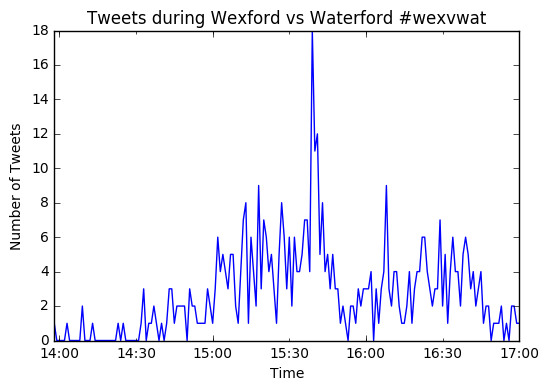

In [73]:
plt.figure()
per_minute.plot()
plt.title("Tweets during Wexford vs Waterford #wexvwat")
plt.ylabel("Number of Tweets")
plt.xlabel("Time")
#plt.gcf().autofmt_xdate()
plt.show()

Want to extract text from tweets and do a wordcloud plot

In [7]:
tknr = TweetTokenizer()

In [8]:
tweets = []

In [9]:
with open('data/stream_wexvwat.json') as f:
    for line in f:
        line = line.strip()
        if line:
            tweets.append(json.loads(line))           

In [10]:
import nltk.stem.snowball

In [11]:
stemmer = nltk.stem.snowball.SnowballStemmer('english')

In [12]:
punctuation = list(string.punctuation)

In [13]:
stop = stopwords.words('english') + punctuation + ['rt', 'via' , 'wexford', 'waterford','thesundaygame', 'hurling']

In [14]:
tokens = []
for tweet in tweets:
    tokens.append(tknr.tokenize(tweet['text'].lower()))

In [15]:
terms_stop = []
for i in tokens:
    for j in i:
        if j not in stop and not j.startswith(('http', '#', '@')):
            terms_stop.append(j)

In [16]:
words = ''
for i in terms_stop:
    words = words + i + ' '

In [17]:
wordcloud = WordCloud(width=600, height=400).generate(words)

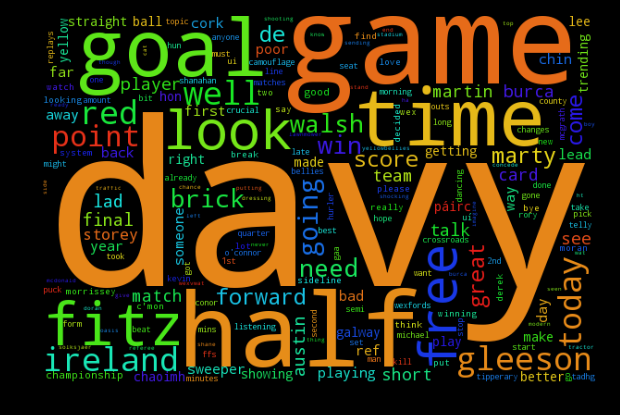

In [18]:
#Word cloud
plt.figure(facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
plt.savefig("wexvwat.png")

In [19]:
wordcloud.to_file("figures/wecxvwat_wordcloud.png")

In [20]:
search = []

In [21]:
with open('data/search_watvwex.json') as f:
    for line in f:
        line = line.strip()
        if line:
            search.append(json.loads(line))       

In [22]:
for tweet in search:
    tokens.append(tknr.tokenize(tweet['text'].lower()))

In [23]:
terms_stop = []
for i in tokens:
    for j in i:
        if j not in stop and not j.startswith(('http', '#', '@')):
            terms_stop.append(j)

In [24]:
words = ''
for i in terms_stop:
    words = words + i + ' '

In [25]:
wordcloud1 = WordCloud(width=600, height=400).generate(words)

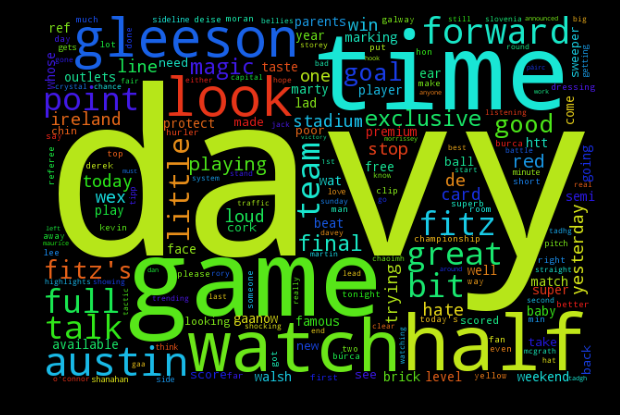

In [26]:
#Word cloud
plt.figure(facecolor='k')
plt.imshow(wordcloud1)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
plt.savefig("wexvwat.png")

In [29]:
terms_bigram = bigrams(terms_stop)

In [30]:
count_all = Counter()

In [31]:
count_all.update(terms_stop)

In [32]:
print(count_all.most_common(5))

[('…', 250), ('...', 232), ('davy', 227), ('game', 173), ('watch', 119)]


In [33]:
count_all = Counter()

In [34]:
count_all.update(terms_bigram)

In [36]:
print(count_all.most_common(10))

[(('austin', 'gleeson'), 108), (('davy', 'fitz'), 87), (('davy', "fitz's"), 76), (('team', 'talk'), 68), (('exclusive', 'davy'), 68), (('half-time', 'team'), 68), (("fitz's", 'half-time'), 68), (('talk', '...'), 68), (('little', 'bit'), 66), (('watch', 'little'), 65)]


### Quick Sentiment Analysis

In [44]:
def get_tweet_sentiment(tweet):
        '''
        Utility function to classify sentiment of passed tweet
        using textblob's sentiment method
        '''
        # create TextBlob object of passed tweet text
        analysis = TextBlob(tweet)
        # set sentiment
        if analysis.sentiment.polarity > 0:
            return 'positive'
        elif analysis.sentiment.polarity == 0:
            return 'neutral'
        else:
            return 'negative'

In [48]:
for tweet in tweets:
    tweet['sentiment'] = get_tweet_sentiment(tweet['text'])
    

In [52]:
tweets[1]['sentiment'], tweets[1]['text']

('positive',
 'Mythen clan on the road supporting the yellow bellies #wexicans #wexvwat https://t.co/qucoOTfCAc')

In [58]:
Counter(tweet_sentiment)

Counter({'negative': 118, 'neutral': 207, 'positive': 170})

In [59]:
ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive']

In [60]:
ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative']

In [61]:
print("Positive tweets percentage: {} %".format(100*len(ptweets)/len(tweets)))

Positive tweets percentage: 34.343434343434346 %


In [62]:
print("Negative tweets percentage: {} %".format(100*len(ntweets)/len(tweets)))

Negative tweets percentage: 23.838383838383837 %


In [66]:
print("Positive tweets:")
for tweet in ptweets[:10]:
    print(tweet['text'])

Positive tweets:
Mythen clan on the road supporting the yellow bellies #wexicans #wexvwat https://t.co/qucoOTfCAc
Considering Wexford gave galway a good run for 30mins the 23/10 to lead at HT - and even the double result 7/1 worth a look - #wexvwat
That is some dig @TheSundayGame  got at @TheNotoriousMMA  brilliant. #SundayGame #NOHYPE #hurling #wexvwat
Dancing At The Crossroads - The Wild Swans
(Wexford GAA Anthem) #WEXvWAT
https://t.co/hgixY4rmjK
Dancing At The Crossroads - The Wild Swans (Wexford GAA Anthem) #WEXvWAT https://t.co/1yjvIXv58O
Hope Wexford win but fancy a Waterford win.. #wexvwat
Waterford by 8 or more #wexvwat
Dancing At The Crossroads
- The Wild Swans #WEXvWAT
https://t.co/osSIp9laho
#wexvwat "Its getting more like the Premiership every day"
Some daft fucker that lad ha ha 
#thesundaygame
Martin Storey would want to have a right look at himself. Cat outfit #wexvwat #gaa #SundayGame


In [65]:
print("Negative tweets:")
for tweet in ntweets[:10]:
    print(tweet['text'])

Negative tweets:
Very poor form @SuperValuIRL , seats sold for #WexVWat game in Cork so bad even Michael OLeary would be too embarrassed to sell.
RT @AidanKielthy: Very poor form @SuperValuIRL , seats sold for #WexVWat game in Cork so bad even Michael OLeary would be too embarrassed t…
Realising you went to school with half the Waterford team. Fairplay lads. #wexvwat https://t.co/FB41Uo5UKN
@Woolberto A game for bad hurlers Wooly #wexvwat
#Hurling WexVWat Looking forward to the hurling but not to commentary from #Marty #Morrissey he is desperate....
Fingers crossed for Davy fitz and dan shannahan "bumping into" each other on the sideline #wexvwat
C'mon Wexford. G'wan the yellow bellies.  #wexvwat
Davy looks like a man going cutting a few hedges with those earphones! #GAA #wexvwat
All set here 4 the game in the Fennell household. C'mon on the Deise @WaterfordGAA  #wexvwat #gaa #hurling #family https://t.co/RbvbAxgj5G
RT @HurlingHotspot: Davy looks like a man going cutting a few hedges w

In [67]:
def get_tweet_polarity(tweet):
        analysis = TextBlob(tweet)
        return analysis.sentiment.polarity

### Geolocation

In [104]:
with open('data/search_watvwex.json', 'r') as f:
    geo_data = {
        "type": "FeatureCollection",
        "features": []
    }
    for line in f:
        line = line.strip()
        if line:
            tweet = json.loads(line)
            if tweet['coordinates']:
                geo_json_feature = {
                    "type": "Feature",
                    "geometry": tweet['coordinates'],
                    "properties": {
                        "text": tweet['text'],
                        "created_at": tweet['created_at']
                }
            }
            geo_data['features'].append(geo_json_feature)

with open('geo_data.json', 'w') as fout:
    fout.write(json.dumps(geo_data, indent=4))

In [106]:
geo_data.keys()

dict_keys(['type', 'features'])

In [132]:
lat_long = []
for feature in geo_data['features']:
    lat_long.append(feature['geometry']['coordinates'])
    

In [144]:
lat_long_df = pd.DataFrame(lat_long, columns = ['lat', 'long'])

In [151]:
lat_long_df.lat.unique(), lat_long_df.long.unique()

(array([-7.11194]), array([ 52.2583]))

Only one geolocation. 